# Регрессия (Regression)

---

Литература:

[Руководство для начинающих](https://mlbootcamp.ru/ru/article/tutorial/)

[Введение в машинное обучение Сапунов Григорий CTO / Intento (inten.to)](https://www.hse.ru/data/2017/05/14/1171296413/%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D0%B8%D0%B9%20%D0%A1%D0%B0%D0%BF%D1%83%D0%BD%D0%BE%D0%B2%20%E2%80%94%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.pdf)

[Multiple Linear Regression Explained!](https://medium.com/datadriveninvestor/multiple-linear-regression-explained-8aa6cee9e796)

[Лекция 6. Корреляционный и регрессионный анализ](https://ppt-online.org/96724)

[Linear Regression and its Mathematical implementation](https://hackernoon.com/linear-regression-and-its-mathematical-implementation-sc1ql24o8)

[Простые регрессионные модели в Python](https://nagornyy.me/courses/data-science/regression/)

[Регрессионный анализ Кольцов С.Н](https://linis.hse.ru/data/2015/05/28/1096846759/%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%208.pdf)

[Линейная регрессия Анна Лауринавичюте](https://www.hse.ru/data/2014/12/26/1103966229/mixed_effects_modeling.pdf)

[Все модели машинного обучения за 6 минут](https://nuancesprog.ru/p/6621/)

[UNDERSTANDING MULTI-DIMENSIONAL LINEAR REGRESSION, CLOSED FORM](https://www.easymachinelearning.net/introml/understanding-multi-dimensional-linear-regression-and-polynomial-regression/)

[Классическое машинное обучение: задачи классификации, обобщения, кластеризации данных](https://evergreens.com.ua/ru/articles/classical-machine-learning.html)

---

## Описание
---

**Тип**:

Обучение с учителем (supervised learning).

---

**Примеры использования**:

- Прогнозирование уровня экспрессии гена
- Предсказание цены дома по его характеристикам
- Предсказание спроса на товар на ближайший месяц
- Предсказание уровня воды в водохранилище
- Предсказание температуры воздуха

---

**Дано**:

Признаки (features).

Примеры:
- возраст
- площадь
- объем
- цвет
- число покупок

---

**Результат**:

Действительное число или числовой вектор.

Примеры:
- стоимость дома
- количество выделяемого углекислого газа
- доход клиента
- рост человека

---

## Линейная регрессия

Геометрически определяет прямую, наиболее близко проходящую ко всем точкам.

<img src="images/linear_nonlinear.jpg" alt="linear_nonlinear" width=500 height=500/>

### Простая линейная регрессия (Simple Regression)

$y=b1*x+b0$

$y$ - зависимая переменная, что мы измеряем в эксперименте (dependent variable)

$x$ - независимая переменная (independent variable)

$b1$ - показывает, насколько изменяется зависимая переменная при изменении независимой переменной (coef | slope)

$b0$ - показывает, чему равна зависимая переменная, если предиктор равен нулю (intercept)

<center><img src="images/linear_regression_marks.png" alt="linear_regression_marks" width=500 height=500"/></center>

![linear_regression.gif](images/linear_regression.gif)

#### Импортировать пакеты
- `matplotlib.pyplot` и `pylab` - рисование графиков
- `pandas` - работа с таблицами
- `numpy` - работа с матрицами

In [1]:
import matplotlib.pyplot as plt
import pylab as pl

import pandas as pd

import numpy as np

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"]=10,10

#### Анализ данных

`FuelConsumption.csv` (Рейтинги расхода топлива):

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


#### Загрузка данных

In [3]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/FuelConsumptionCo2.csv")
df = pd.read_csv(data_csv)

# вывести первые 5 строк из таблицы
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# вывести последние 5 строк таблицы
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


#### Исследование данных (Data Exploration)

**По умолчанию будет выдана информация только для количественных признаков.**
- `count` - количество элементов
- `mean` - среднее значение
- `std` - стандартное отклонение
- `min` - минимальное значение
- `25%` - нижний квартиль
- `50%` - медиана
- `75%` - верхний квартиль
- `max` - максимальное значение

In [5]:
# обзор Dataframe из файла FuelConsumptionCo2.csv
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# выбрать несколько столбцов для дальнейшего рассмотрения
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

cdf.head(9)    # вывести первые 9 строк

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


type:  <class 'pandas.core.frame.DataFrame'>


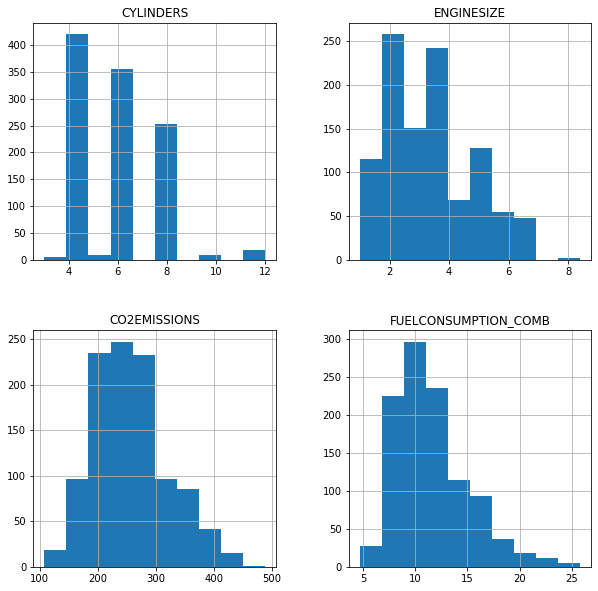

In [7]:
# выбрать несколько столбцов для визуализации
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

print('type: ', type(viz))    # вывести тип данных переменной viz

viz.hist()    # гистограмма
plt.show()

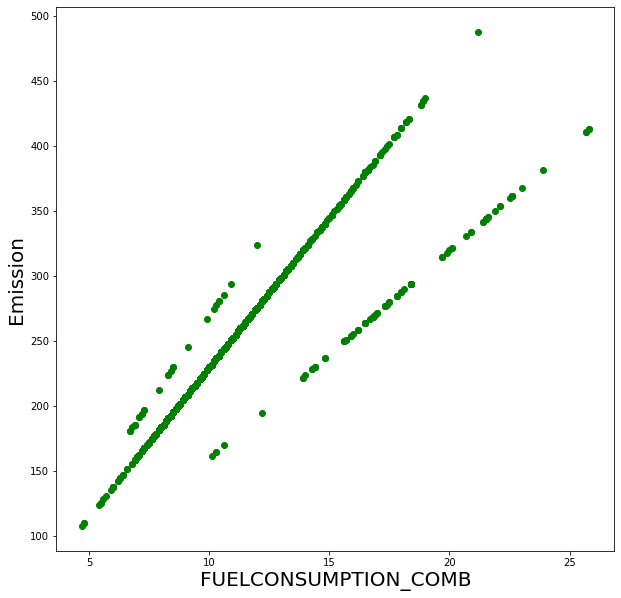

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

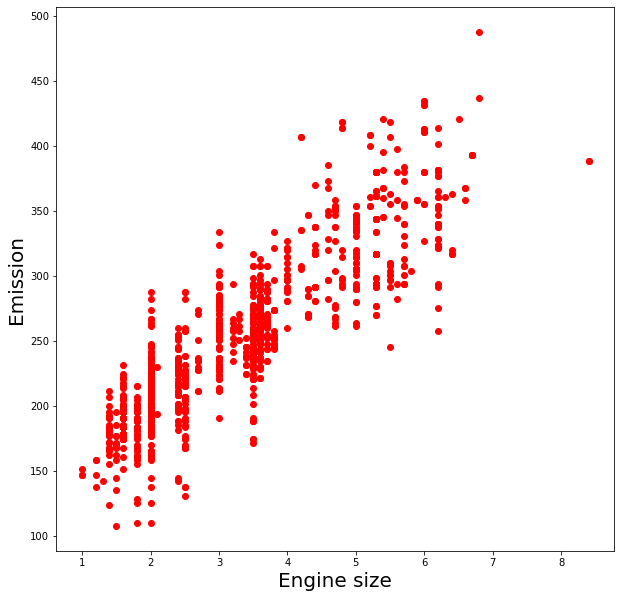

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

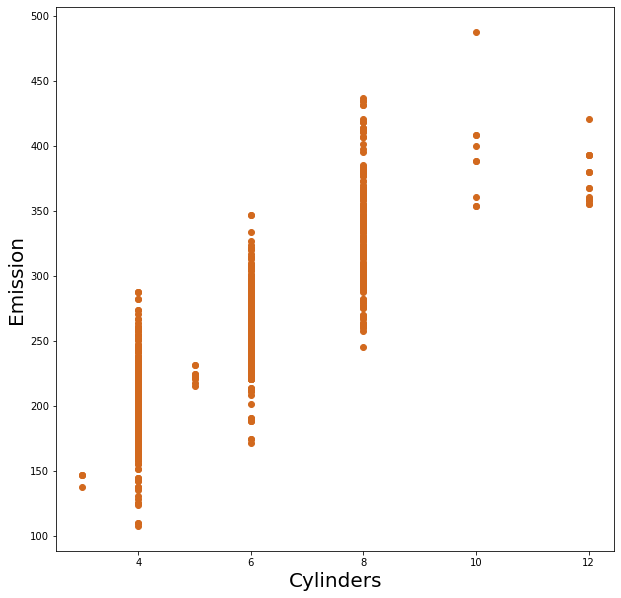

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='chocolate')
plt.xlabel("Cylinders", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

#### Обучение модели (Train)

In [11]:
# разделить данные на train (80%) и test (20%)
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Вспомним отношение `CO2EMISSIONS` и `ENGINESIZE` (остальные признаки не рассматриваем).

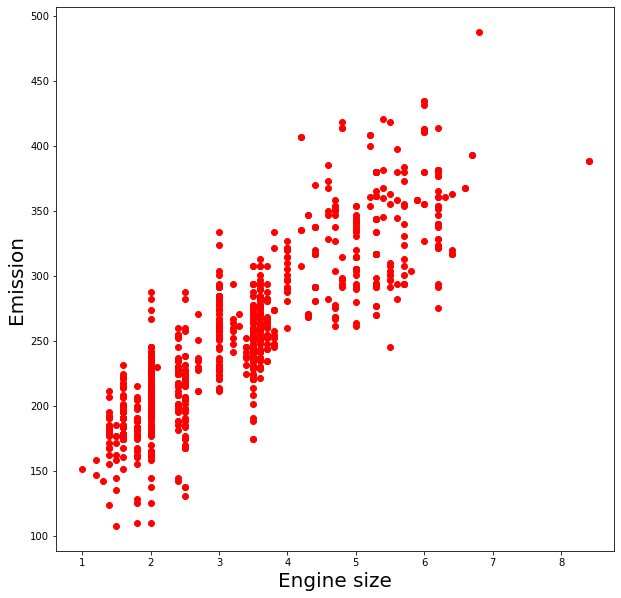

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)
plt.show()

In [13]:
# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# разделить независимую и зависимую переменные
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

# обучить модель
simple_regr.fit(x_train, y_train)

# вывести результаты обучения
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ',simple_regr.intercept_)

Coefficients:  [[39.0094076]]
Intercept:  [125.00521729]


#### Визуализация результата обучения модели

Text(0, 0.5, 'Emission')

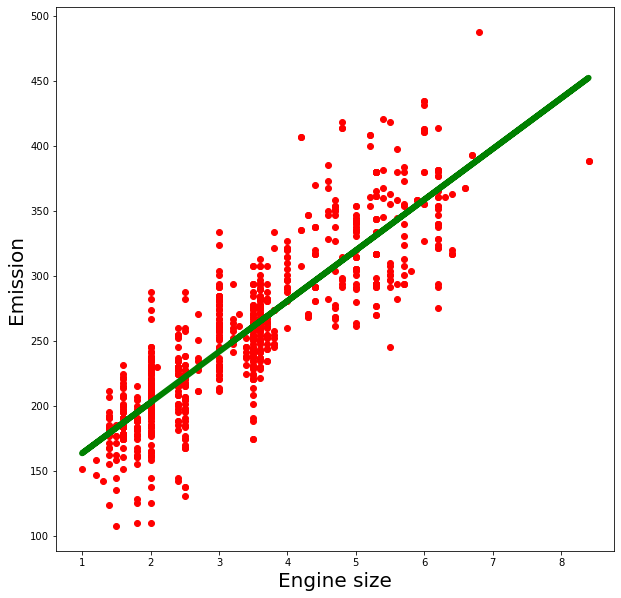

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.plot(x_train, simple_regr.coef_[0][0]*x_train + simple_regr.intercept_[0], '-g', linewidth=6)
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)

In [15]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(test[['ENGINESIZE']])
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

# вывести результаты предсказания
print(f'Variance score: {simple_regr.score(x_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.7914651980459726
Residual sum of squares: 803.2777537858053


In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)    # эквивалентно simple_regr.score(x_test, y_test)

0.7914651980459726

In [17]:
from sklearn.metrics import mean_squared_error

# MSE
mean_squared_error(y_test, y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y_test) ** 2)

803.2777537858053

### Множественная линейная регрессия (Multiple linear regression)

<center><img src="images/simple_multiple_linear_regression.png" alt="simple_multiple_linear_regression" width=700 height=700"/></center>

In [18]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# выбрать даннные для обучения / предсказания
columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']

# разделить независимую и зависимую переменные
x_train = np.asanyarray(train[columns])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

# обучить модель
multiple_regr.fit(x_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

Coefficients:  [[9.07018557 8.5304011  9.8494632 ]]
Intercept:  [62.15043123]


In [19]:
# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(test[columns])
x_test = np.asanyarray(test[columns])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

# вывести результаты предсказания
print(f'Variance score: {multiple_regr.score(x_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.8589980717917138
Residual sum of squares: 543.1405746633554


In [20]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)    # эквивалентно regr.score(x, y)

0.8589980717917138

In [21]:
from sklearn.metrics import mean_squared_error

# MSE
mean_squared_error(y_test, y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y) ** 2)

543.1405746633554

## Нелинейная регрессия
Геометрически определяет кривую, наиболее близко проходящую ко всем точкам.

![linear_nonlinear.jpg](images/linear_nonlinear.jpg)

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$

Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$


### Примеры полиномиальных функций

#### Линейная функция (Linear function)

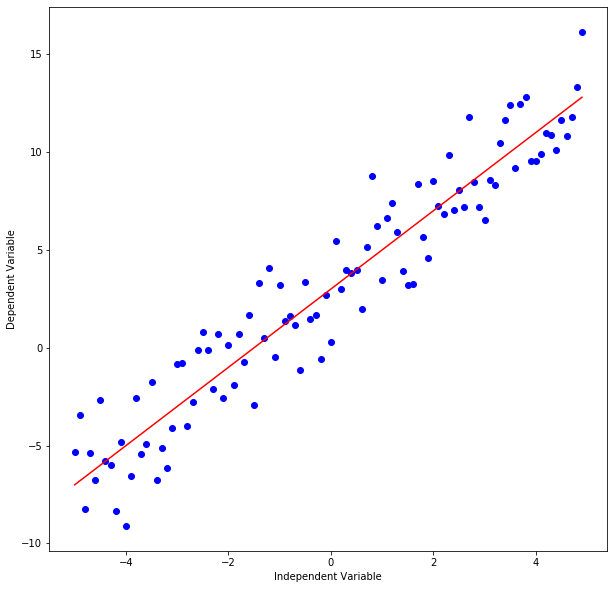

In [22]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Квадратичная функция (Quadratic function)
$$ Y = X^2 $$

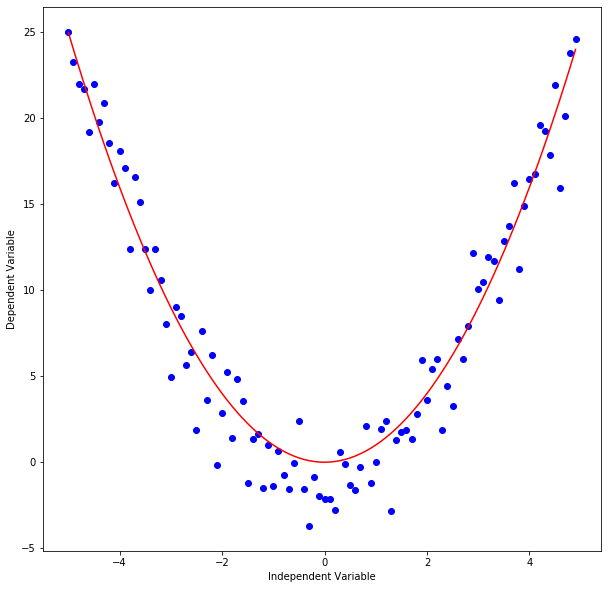

In [23]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Кубическая функция (Cubic function)

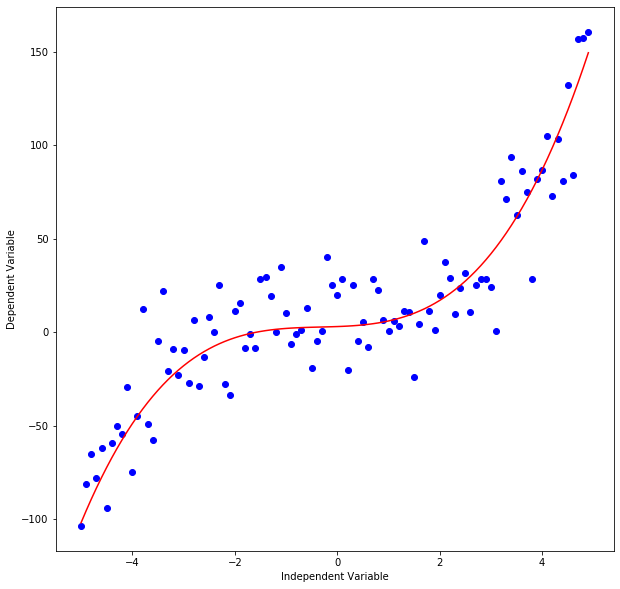

In [24]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Экспоненциальная функция (Exponential function)

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


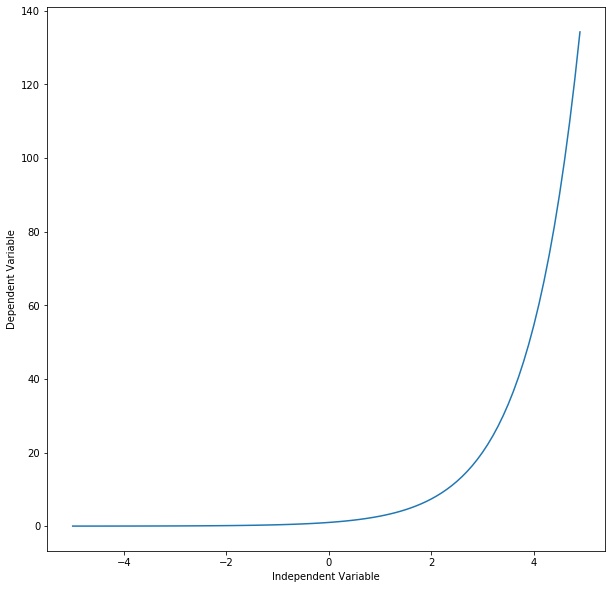

In [25]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Логарифмическая функция (Logarithmic function)

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

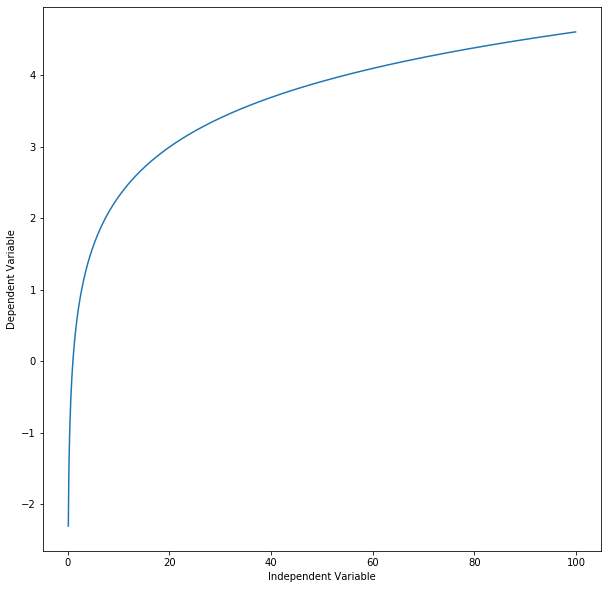

In [26]:
X = np.arange(0.1, 100.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Сигмоида / Логистическое уравнение (Sigmoid/Logistic function)
$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

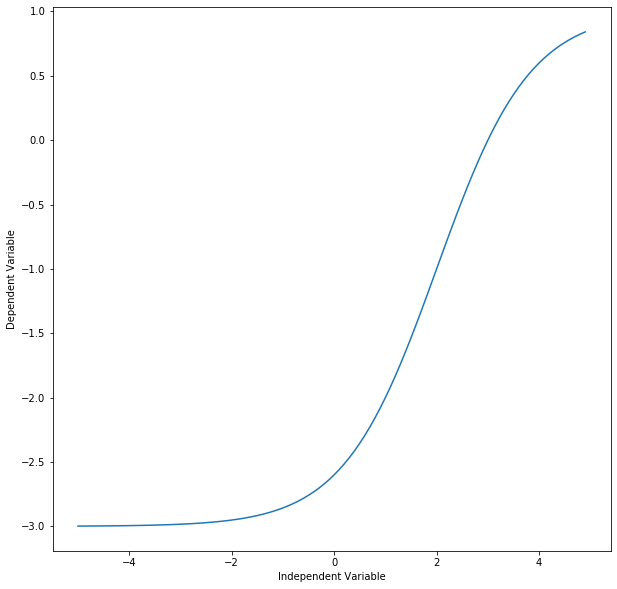

In [27]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Полиномиальная регрессия

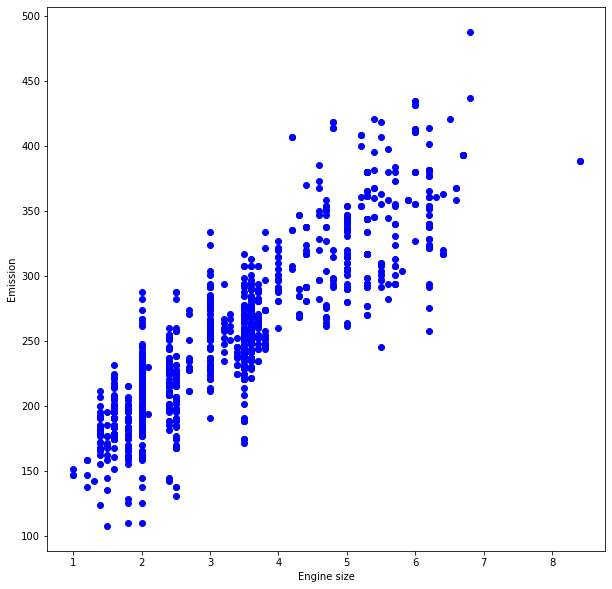

In [30]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 

so we can use **LinearRegression()** function to solve it:


In [33]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.36651766 -1.77689087]]
Intercept:  [103.77535683]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


Text(0, 0.5, 'Emission')

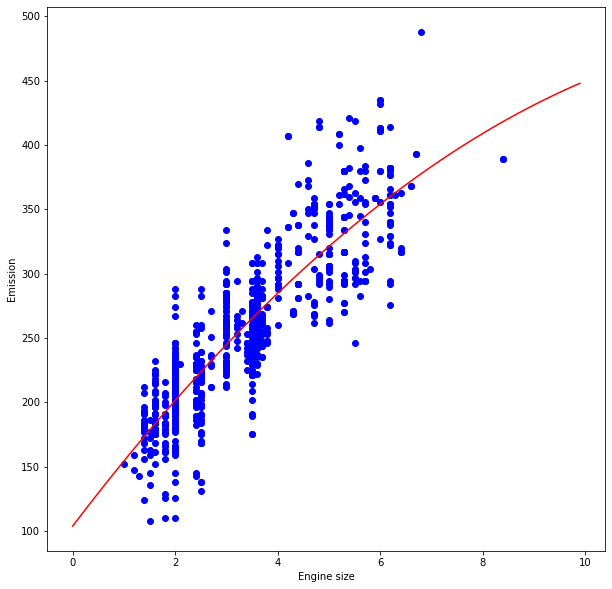

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>


In [36]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.15
Residual sum of squares (MSE): 814.12
R2-score: 0.73


Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?


Coefficients:  [[ 0.         27.74647706  4.95734706 -0.55505064]]
Intercept:  [130.12415644]
Mean absolute error: 21.27
Residual sum of squares (MSE): 816.62
R2-score: 0.73


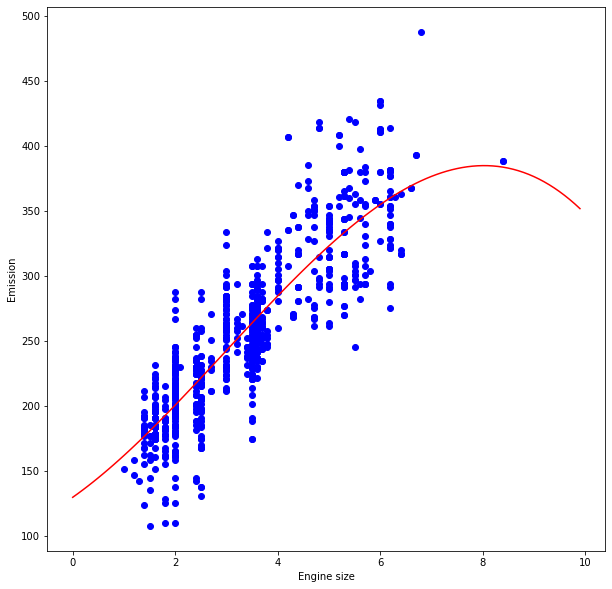

In [37]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )


For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 


In [ ]:
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/china_gdp.csv")

df = pd.read_csv(data_csv)
df.head(10)

### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.


In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters. 


In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:


In [ ]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [ ]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.


In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

Now we plot our resulting regression model.


In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Can you calculate what is the accuracy of our model?


In [ ]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )
